In [26]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Portfolio.json summary

In [2]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [2]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [3]:
portfolio.groupby("offer_type").mean()

,reward,difficulty,duration
offer_type,,,
bogo,7.5,7.50,6.0
discount,3.0,11.75,8.5
informational,0.0,0.00,3.5


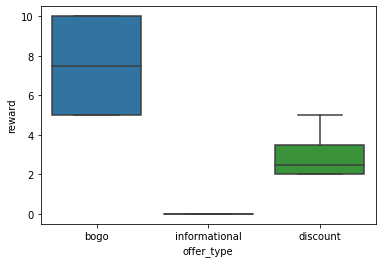

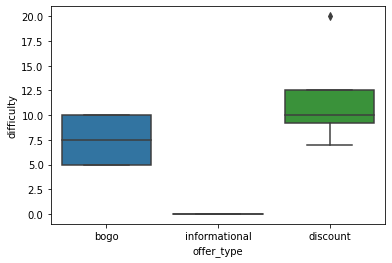

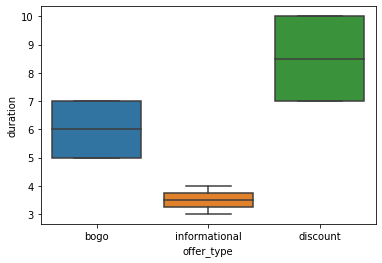

In [62]:
sns.boxplot(data=portfolio, x="offer_type", y="reward")
plt.show()

sns.boxplot(data=portfolio, x="offer_type", y="difficulty")
plt.show()

sns.boxplot(data=portfolio, x="offer_type", y="duration")
plt.show()

<AxesSubplot:xlabel='offer_type', ylabel='count'>

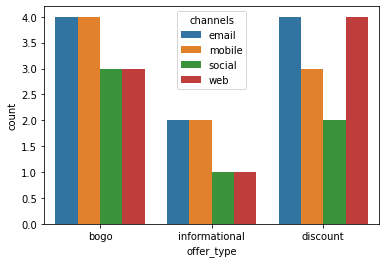

In [80]:
sns.countplot(data=portfolio.explode("channels"), x="offer_type", hue="channels")

# Profile.json

In [4]:
profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [81]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [6]:
profile.age.replace({118: np.NaN}, inplace=True)
profile

,gender,age,id,became_member_on,income
0,None,NaN,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,NaN,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,NaN,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45.0,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61.0,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49.0,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83.0,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [5]:
profile['member_since'] = profile.became_member_on.astype(str).str[:4]
profile['member_since'].value_counts()

2017    6469
2018    4198
2016    3526
2015    1830
2014     691
2013     286
Name: member_since, dtype: int64

In [8]:
pd.DataFrame(profile.isna().sum() / len(profile)).T

,gender,age,id,became_member_on,income,member_since
0,0.127941,0.127941,0.0,0.0,0.127941,0.0


In [9]:
profile.gender.value_counts(dropna=False) / len(profile)

M      0.499059
F      0.360529
NaN    0.127941
O      0.012471
Name: gender, dtype: float64

In [10]:
profile.id.duplicated().sum()

0

<AxesSubplot:ylabel='Frequency'>

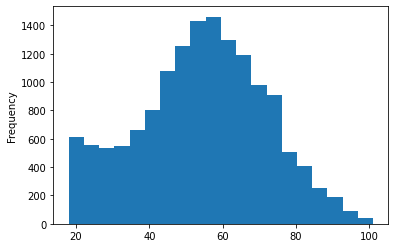

In [11]:
profile.age.plot.hist(bins=20)

<AxesSubplot:xlabel='gender', ylabel='count'>

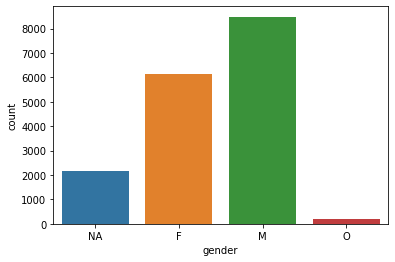

In [48]:
sns.countplot(data=profile.fillna("NA"), x="gender")

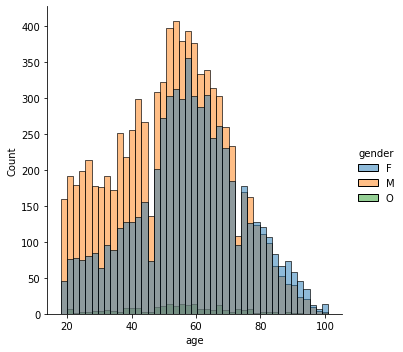

In [50]:
sns.displot(data=profile, x="age", hue="gender")

<AxesSubplot:xlabel='age', ylabel='income'>

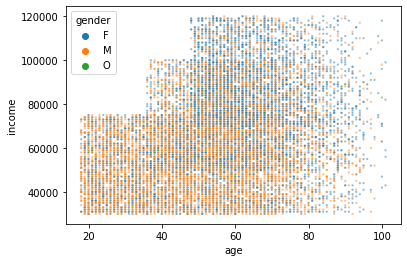

In [57]:
sns.scatterplot(data=profile, x="age", y="income", hue="gender", alpha=0.5, s=5)

# Age-Income scatter plot by gender

<AxesSubplot:xlabel='age', ylabel='income'>

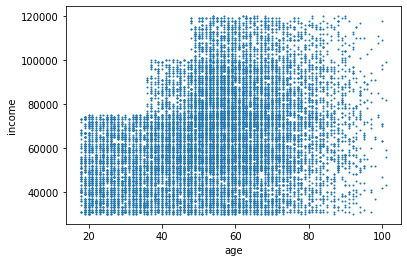

In [16]:
profile[['age', 'income']].plot.scatter(x='age', y='income',s=1)

<AxesSubplot:xlabel='age', ylabel='income'>

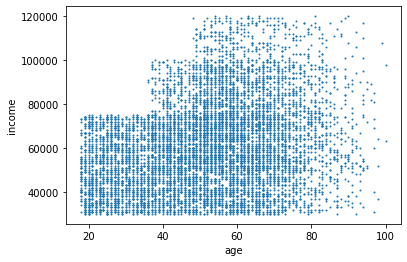

In [17]:
profile[profile.gender == 'M'][['age', 'income']].plot.scatter(x='age', y='income',s=1)

<AxesSubplot:xlabel='age', ylabel='income'>

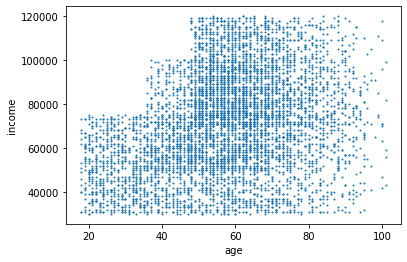

In [18]:
profile[profile.gender == 'F'][['age', 'income']].plot.scatter(x='age', y='income',s=1)

<AxesSubplot:xlabel='age', ylabel='income'>

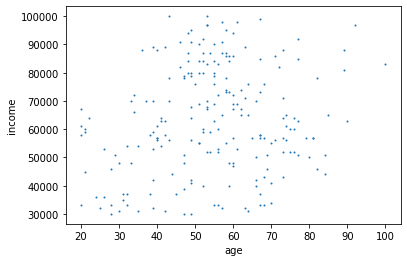

In [19]:
profile[profile.gender == 'O'][['age', 'income']].plot.scatter(x='age', y='income',s=1)

# Transcript

In [83]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [85]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


<AxesSubplot:xlabel='event', ylabel='count'>

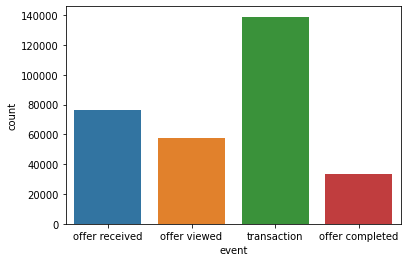

In [9]:
# transcript.event.value_counts().plot(kind="bar")
sns.countplot(data=transcript, x="event")

In [19]:
offer_types = ["offer received", "offer viewed", "offer completed"]
# transcript.loc[transcript.event.isin(), ["person", "event", "value"]].dropna()


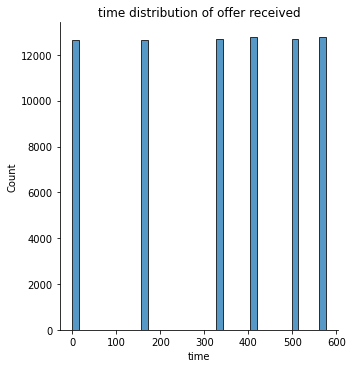

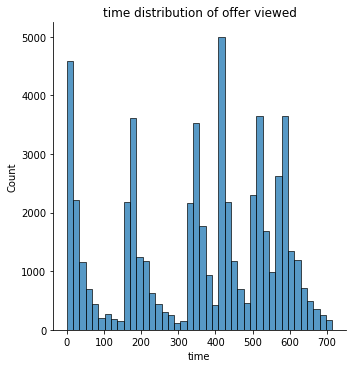

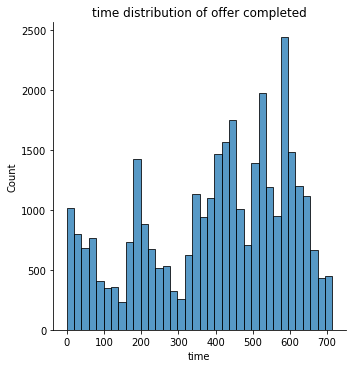

In [27]:
for ot in offer_types:
    ax = sns.displot(data=transcript[transcript.event == ot], x="time")
    plt.title(f"time distribution of {ot}")
    plt.show()

In [29]:
# transcations only
transactions = transcript[transcript.event == 'transaction']
transactions["amount"] = transactions.value.apply(lambda x: x['amount'])
transactions

/Users/hg_kim/.pyenv/versions/3.6.10/envs/drlnd/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,person,event,value,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0,34.56
12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0,18.97
...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,3.53


<Figure size 1080x576 with 0 Axes>

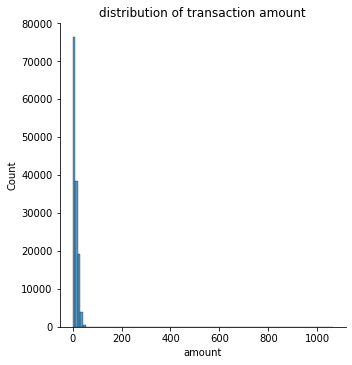

In [36]:
ax = sns.displot(data=transactions, x="amount", bins=100)
plt.title("distribution of transaction amount")
plt.show()

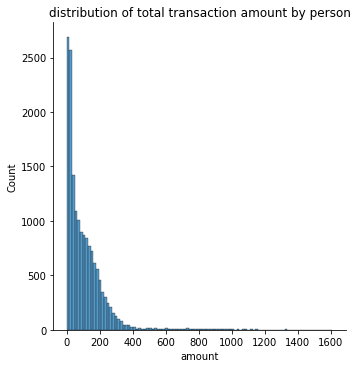

In [42]:
ax = sns.displot(data=pd.DataFrame(transactions.groupby("person").sum()), x="amount", bins=100)
plt.title("distribution of total transaction amount by person")
plt.show()

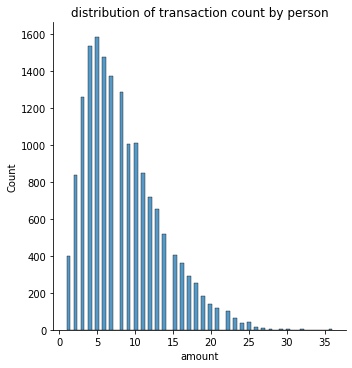

In [44]:
ax = sns.displot(data=pd.DataFrame(transactions.groupby("person").count()), x="amount")
plt.title("distribution of transaction count by person")
plt.show()

In [23]:
# transaction count by person
transactions.groupby('person').count()

,event,value,time
person,,,
0009655768c64bdeb2e877511632db8f,8,8,8
00116118485d4dfda04fdbaba9a87b5c,3,3,3
0011e0d4e6b944f998e987f904e8c1e5,5,5,5
0020c2b971eb4e9188eac86d93036a77,8,8,8
0020ccbbb6d84e358d3414a3ff76cffd,12,12,12
...,...,...,...
fff3ba4757bd42088c044ca26d73817a,11,11,11
fff7576017104bcc8677a8d63322b5e1,6,6,6
fff8957ea8b240a6b5e634b6ee8eafcf,5,5,5


In [24]:
offer_received = transcript[transcript.event == 'offer received']
offer_received

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
257882,d087c473b4d247ccb0abfef59ba12b0e,offer received,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},576
257883,cb23b66c56f64b109d673d5e56574529,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},576
257884,6d5f3a774f3d4714ab0c092238f3a1d7,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},576
257885,9dc1421481194dcd9400aec7c9ae6366,offer received,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},576


In [25]:
offer_viewed = transcript[transcript.event == 'offer viewed']
offer_viewed

,person,event,value,time
12650,389bc3fa690240e798340f5a15918d5c,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
12651,d1ede868e29245ea91818a903fec04c6,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0
12652,102e9454054946fda62242d2e176fdce,offer viewed,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
12653,02c083884c7d45b39cc68e1314fec56c,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},0
12655,be8a5d1981a2458d90b255ddc7e0d174,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0
...,...,...,...,...
306441,d56386cf344c4829bbf420d1895dca37,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},714
306450,9b51e8797290403b90d09d864dec4b94,offer viewed,{'offer id': '3f207df678b143eea3cee63160fa8bed'},714
306483,84fb57a7fe8045a8bf6236738ee73a0f,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},714
306490,abc4359eb34e4e2ca2349da2ddf771b6,offer viewed,{'offer id': '3f207df678b143eea3cee63160fa8bed'},714


In [26]:
offer_completed = transcript[transcript.event == 'offer completed']
offer_completed

,person,event,value,time
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0
12679,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,0
12692,676506bad68e4161b9bbaffeb039626b,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,0
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,0
...,...,...,...,...
306475,0c027f5f34dd4b9eba0a25785c611273,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,714
306497,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,714
306506,b895c57e8cd047a8872ce02aa54759d6,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714
306509,8431c16f8e1d440880db371a68f82dd0,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714


event
offer completed    AxesSubplot(0.125,0.125;0.775x0.755)
offer received     AxesSubplot(0.125,0.125;0.775x0.755)
offer viewed       AxesSubplot(0.125,0.125;0.775x0.755)
transaction        AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

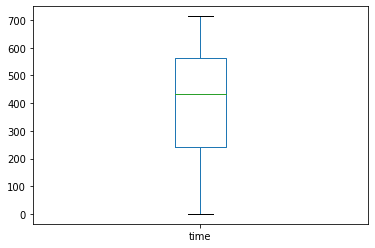

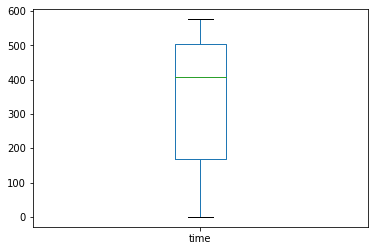

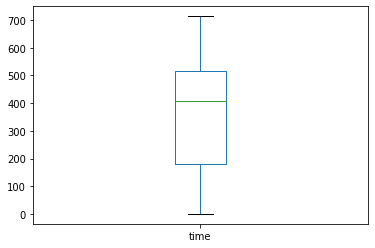

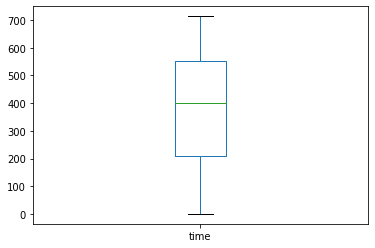

In [31]:
# boxplot for time - event type
transcript.groupby("event").plot.box(x='event', y='time')

In [32]:
transcript[transcript.event == 'offer received'].time.unique()

array([  0, 168, 336, 408, 504, 576])

<AxesSubplot:ylabel='Frequency'>

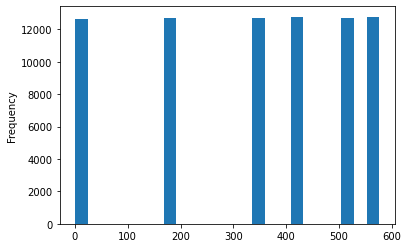

In [33]:
transcript[transcript.event == 'offer received'].time.plot.hist(bins=24)